## Read Data
import the pandas library

**`"pandas.read_csv()"`**  function to read the csv file.

**`header = none`** makes the first column in the data **not** the header (instead of index).
`names =` uses a list to make the column names out of

**`.head()`** shows top 5 rows, **`.tail()`** bottom 5

In [26]:
# import pandas library
import pandas as pd
import numpy as np

# read the online file by the URL, and assign it to variable "df"
path="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(path,header=None)

#offline mode - use file in same folder
#path = "automobile.xls"
#df = pd.read_excel(path, header = None)

df.head()

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Clean Data

Firstly, we create a list "headers" that include all column names in order.

Then, we use **`df.columns = headers`** to replace the headers by the list we created.

Remove the entries that don't have target variable (price, "colY") by **`df.dropna(subset=["colY"], axis=0)`**. Axis  0 cleans rows

In [27]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.dropna(subset=["price"], axis=0)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [39]:
#df_num = df[isinstance(df,float)]
df.iloc[:,1]

1        ?
2        ?
3        ?
4      164
5      164
6        ?
7      158
8        ?
9      158
10       ?
11     192
12     192
13     188
14     188
15       ?
16       ?
17       ?
18       ?
19     121
20      98
21      81
22     118
23     118
24     118
25     148
26     148
27     148
28     148
29     110
30     145
      ... 
176     65
177     65
178     65
179    197
180    197
181     90
182      ?
183    122
184    122
185     94
186     94
187     94
188     94
189     94
190      ?
191    256
192      ?
193      ?
194      ?
195    103
196     74
197    103
198     74
199    103
200     74
201     95
202     95
203     95
204     95
205     95
Name: normalized-losses, Length: 205, dtype: object

## Read/Save Other Data Formats
Below are the methods for reading and saving files of each type

| Data Formate  | Read           | Save             |
| ------------- |:--------------:| ----------------:|
| csv           | `pd.read_csv()`  |`df.to_csv()`     |
| json          | `pd.read_json()` |`df.to_json()`    |
| excel         | `pd.read_excel()`|`df.to_excel()`   |
| hdf           | `pd.read_hdf()`  |`df.to_hdf()`     |
| sql           | `pd.read_sql()`  |`df.to_sql()`     |
| ...           |   ...          |       ...        |

For example, if you would save the dataframe "df" as "automobile.csv" to your local machine, you may use the syntax below:
~~~~
df.to_csv("automobile.csv")
~~~~

In [4]:
df.to_excel("automobile_DW.xls")

## Describe
If we would like to get a statistical summary of each column, such as  count, column mean value, column standard deviation, etc. We use the **`.describe()`** method

**`.info()`**  or **`.dtype()`** gives information about the dataframe, including the types of data (so you know what analysis to do)

In [5]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

## Indexing
**`df[[a,b]]`** gathers the a-th and b-th columns. You can also use column names

In [7]:
df[['length','compression-ratio']].describe()

,length,compression-ratio
count,205.000000,205.000000
mean,174.049268,10.142537
std,12.337289,3.972040
min,141.100000,7.000000
25%,166.300000,8.600000
50%,173.200000,9.000000
75%,183.100000,9.400000
max,208.100000,23.000000


# Data Wrangling
Cleaning data so we can use it

Requires NumPy for matrices

In [8]:
import numpy as np

## Nan Values
When an entry is missing, we have to consider how we will work with it. But first, we must replace with NaN (not a number)

`.replace(A, B)` replaces "A" entries with "B". `inplace = True)` argument does it **in** the table

`.isnull()` returns a table with "true" on NaN values.

The loop counts the instances of NaN values, so you can determine if there's any problematic samples

In [2]:
df.replace("?", np.nan, inplace = True)

def FindMissing(dataframe):
    missing_data = dataframe.isnull()
    for column in missing_data.columns.values.tolist():
        print(column)
        print (missing_data[column].value_counts())
        print("") 
        
FindMissing(df)

NameError: name 'df' is not defined

## Deal with missing data
How to deal with missing data?
    
    1. drop data 
        a. drop the whole row
        b. drop the whole column
Do this when the whole column/row is useless without that data entry (e.g. if it's missing the predictor)

    2. replace data
        a. replace it by mean
        b. replace it by frequency
        c. replace it based on other functions
Chose the function based on an estimator which is least harmful

## Replace by Mean
`df["col"].astype("float").mean(axis = 0)` to get mean of column

Replace by that value

In [10]:
avg_1 = df["normalized-losses"].astype("float").mean(axis = 0)
df["normalized-losses"].replace(np.nan, avg_1, inplace = True)

avg_2=df['bore'].astype('float').mean(axis=0)
df['bore'].replace(np.nan, avg_2, inplace= True)
avg_3 = df["stroke"].astype("float").mean(axis=0)
df['bore'].replace(np.nan, avg_3, inplace = True)
avg_4=df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_4, inplace= True)
avg_5=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_5, inplace= True)

## Replace by Mode
`df['col'].value_counts()` To count frequency of values

`.idxmax()` returns the max count **in the same type** as it appears in the data

In [11]:
df['num-of-doors'].value_counts()
df['num-of-doors'].value_counts().idxmax()
df["num-of-doors"].replace(np.nan, "four", inplace = True)

## Drop
`.drop("col", axis = 1, inplace=True)` to drop the whole column

`.dropna(subset=["col"], axis = 0, inplace=True)` to drop the row with a NA value there
And reset index


In [12]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace = True)

# reset index, because we droped two rows
df.reset_index(drop = True, inplace = True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Correcting the Type
`df.dtypes` to determine types

Set those desired to be integers `.astype("int")` and floats `.astype("float")`

In [13]:
df[["bore", "stroke",'price', "peak-rpm", 'horsepower']] = df[["bore", "stroke",'price', "peak-rpm", 'horsepower']].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")

df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Standardising
Create linear functions and replace the data by those in order to maintain consistent units of measurement

In [14]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]
df['highway-L/100km'] = 235/df["highway-mpg"]

## Normalising
So they fit a similar range and can thus be compared.

For example, take the dimensions of the car to a range from (0,max)

In [15]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

## Binning
To turn very specific numerical data into categorical (e.g. Horsepower - don't care about specific value, only if it's low/med/high = 3 bins)

1. Set the width (cutoffs) of each bin
2. Create a list of each cutoff value
3. Name the bins
4. Use `.cut()` to arrange them into bins

Arguments of `cut` are `target`, `ranges`, `labels`, `include_lowest=True` to set [a,b) ranges

In [1]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), num = 4) # num = 4 because there are 4 cutoff points in 3 bins
df['horsepower-binned'] = pd.cut(df['horsepower'], bins)
df[['horsepower','horsepower-binned']].head(20)

NameError: name 'np' is not defined

## Bins visualization 
Normally, a histogram is used to visualize the distribution of bins we created above. 

Text(0.5,1,'horsepower bins')

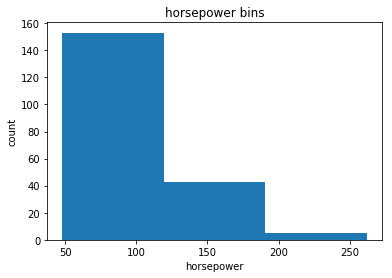

In [17]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

## Indicator Variables
1. Create tables of each count and an indicator variable 
2. Rename the columns for clarity with `.rename()'
3. Join them to data frame with `pd.concat()`

In [18]:
df[['aspiration']].head()

,aspiration
0,std
1,std
2,std
3,std
4,std


In [19]:
dv1 = pd.get_dummies(df["fuel-type"])
dv2 = pd.get_dummies(df['aspiration'])

dv1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
dv2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

dv1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [20]:
df = pd.concat([df, dv1, dv2], axis=1)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,21,27,13495.0,11.190476,8.703704,Medium,0,1,1,0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,21,27,16500.0,11.190476,8.703704,Medium,0,1,1,0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,24,30,13950.0,9.791667,7.833333,Medium,0,1,1,0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,18,22,17450.0,13.055556,10.681818,Medium,0,1,1,0


# Exploratory Data Analysis

In [21]:
#Install these libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import pandas as pd
import seaborn as sns

#Will be using this data set
path = "automobile_Exploratory.xls"
df = pd.read_excel(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450,13.055556,Medium,0,1


`.describe()` shows the descriptive statistics of the data

`include=['object']` argument adds categorical data

In [22]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


## Correlation Tables
We can see the engine size and mileage is correlated with price, but peak rpm isn't

In [23]:
df1 = df[['engine-size','highway-mpg','peak-rpm','price']]
df1.corr()

,engine-size,highway-mpg,peak-rpm,price
engine-size,1.000000,-0.679571,-0.256733,0.872335
highway-mpg,-0.679571,1.000000,-0.058598,-0.704692
peak-rpm,-0.256733,-0.058598,1.000000,-0.101616
price,0.872335,-0.704692,-0.101616,1.000000


## Regression Plot
Correlation shows in the regression

+ve correlation


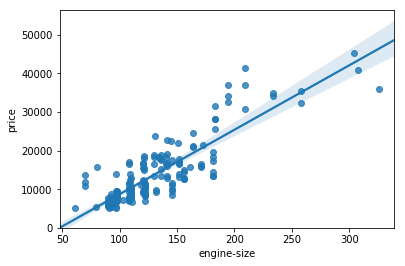

In [24]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)
print("+ve correlation")

-ve correlation


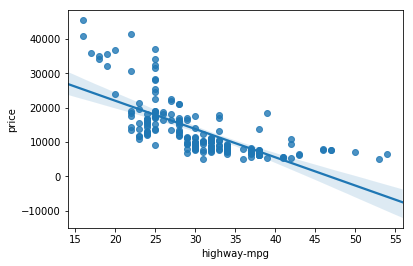

In [25]:
sns.regplot(x='highway-mpg', y='price', data = df)
print("-ve correlation")

no correlation


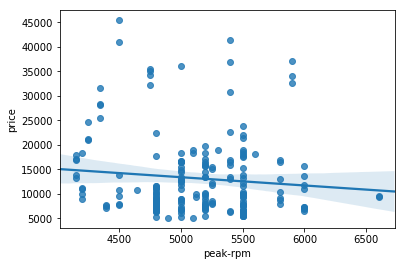

In [26]:
sns.regplot(x="peak-rpm", y="price", data=df)
print("no correlation")

## Categorical Variables
Draw box-plots to

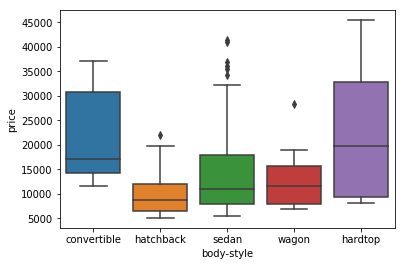

In [27]:
sns.boxplot(x="body-style", y="price", data=df)

## Index Tables
`value_counts()` to count the values

`.to_frame()` convert to dataframe

`drive_wheels_counts.index.name = 'drive-wheels'` to create an index (name the index column)

In [28]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts.rename(columns = {'drive-wheels':'value-counts'},inplace = True)
drive_wheels_counts

,value-counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [29]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450,13.055556,Medium,0,1


## Grouping

`.unique()` values to see the groups

Select the columns you want to consider. Have a y-column (target) and x (predictors)

`.groupby([‘colX’], as_index=False)` Group reduced data according to relevant bins. Maybe append a descriptive stat (like mean) to bin it ( e.g. `.mean()` )

Pivot the grid so index variable is along each row, column variable across the columns
`.pivot(index = ‘colX1’, columns = ‘colX2’)`


In [30]:
COL = df[['drive-wheels','body-style','price']]
GRP = COL.groupby(['drive-wheels','body-style'],as_index= False).mean()
GRP

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [31]:
PIV = GRP.pivot(index = 'drive-wheels', columns = 'body-style').fillna(0)
PIV

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Use PyPlot Library to make a heatmap

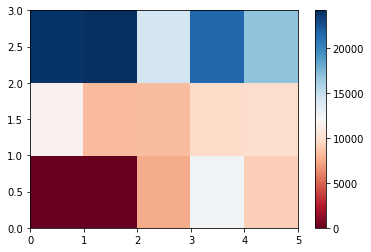

In [32]:
plt.pcolor(PIV, cmap='RdBu')
plt.colorbar()
plt.show()

Manipulating the heat map

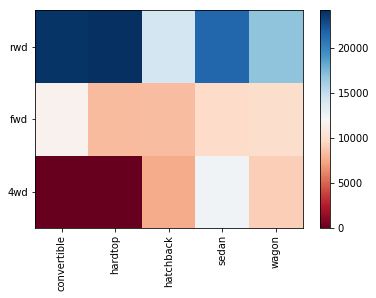

In [33]:
fig, ax=plt.subplots()
im=ax.pcolor(PIV, cmap='RdBu')

#label names
row_labels=PIV.columns.levels[1]
col_labels=PIV.index
#move ticks and labels to the center
ax.set_xticks(np.arange(PIV.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(PIV.shape[0])+0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## Correlation

Below are the steps to making a correlation matrix

In [34]:
from scipy import stats

In [35]:
Corr_DF = df[["highway-mpg","peak-rpm",'length',"engine-size",'price']].corr()
#Corr_DF.to_excel("Corr_DF.xls")
Corr_DF

,highway-mpg,peak-rpm,length,engine-size,price
highway-mpg,1.000000,-0.058598,-0.698142,-0.679571,-0.704692
peak-rpm,-0.058598,1.000000,-0.285970,-0.256733,-0.101616
length,-0.698142,-0.285970,1.000000,0.685025,0.690628
engine-size,-0.679571,-0.256733,0.685025,1.000000,0.872335
price,-0.704692,-0.101616,0.690628,0.872335,1.000000


In [36]:
Corr_DF['price'].sort_values(ascending = False)
#To quickly see most and least correlated values

price          1.000000
engine-size    0.872335
length         0.690628
peak-rpm      -0.101616
highway-mpg   -0.704692
Name: price, dtype: float64

In [37]:
Factors = ["highway-mpg","peak-rpm",'length',"engine-size",'price']

PVals_Table = {}

for col in Factors:
    PVals_Values = []
    for row in Factors:
        pearson_coef, p_value = stats.pearsonr(df[col], df[row])
        PVals_Values.append(round(p_value, 5))
    PVals_Table[col] = PVals_Values

PVals_DF = pd.DataFrame(PVals_Table)
#PVals_DF.to_excel("P-Values_Table.xls")
PVals_DF

,highway-mpg,peak-rpm,length,engine-size,price
0,0.00000,0.40864,0.00000,0.00000,0.00000
1,0.40864,0.00000,0.00004,0.00023,0.15118
2,0.00000,0.00004,0.00000,0.00000,0.00000
3,0.00000,0.00023,0.00000,0.00000,0.00000
4,0.00000,0.15118,0.00000,0.00000,0.00000


In [38]:
Corr_DF.reset_index(drop = True, inplace = True)
Correlation_Matrix = pd.DataFrame()
for col in Factors:
    Correlation_Matrix = pd.concat([Correlation_Matrix, Corr_DF[col], PVals_DF[col]], axis = 1)

Headers = []
for col in Factors:
    Headers.append(col+": Corr")
    Headers.append(col+": p-val")

Correlation_Matrix.columns = Headers
Correlation_Matrix.index = ["highway-mpg","peak-rpm",'length',"engine-size",'price']
#Correlation_Matrix.to_excel("Correlation_Matrix.xls")

Correlation_Matrix

,highway-mpg: Corr,highway-mpg: p-val,peak-rpm: Corr,peak-rpm: p-val,length: Corr,length: p-val,engine-size: Corr,engine-size: p-val,price: Corr,price: p-val
highway-mpg,1.000000,0.00000,-0.058598,0.40864,-0.698142,0.00000,-0.679571,0.00000,-0.704692,0.00000
peak-rpm,-0.058598,0.40864,1.000000,0.00000,-0.285970,0.00004,-0.256733,0.00023,-0.101616,0.15118
length,-0.698142,0.00000,-0.285970,0.00004,1.000000,0.00000,0.685025,0.00000,0.690628,0.00000
engine-size,-0.679571,0.00000,-0.256733,0.00023,0.685025,0.00000,1.000000,0.00000,0.872335,0.00000
price,-0.704692,0.00000,-0.101616,0.15118,0.690628,0.00000,0.872335,0.00000,1.000000,0.00000


## ANOVA
Analysis of Variance tables

**F-test score**: ANOVA assumes the means of all groups are the same, calculates how much the sample means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

**P-value**:  P-value tells how statistically significant is our calculated score value

`stats.f_oneway` function from SciPy determines these

In [39]:
GRP_2 = GRP[['drive-wheels','price']].groupby(['drive-wheels'])
f_val, p_val = stats.f_oneway(GRP_2.get_group('fwd')['price'],
                              GRP_2.get_group('rwd')['price'], 
                              GRP_2.get_group('4wd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 17.54495590883977 , P = 0.0005365411925421271


## Important Predictors

Continuous numerical variables:
- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore

Categorical variables:
- Drive-wheels

AS we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

In [40]:
# Create a dataset for numerical variables
mdf = df[['length','width','curb-weight',
               'engine-size','horsepower','city-mpg',
               'highway-mpg','wheel-base','bore',
               'drive-wheels','price']]

mdf.head()

,length,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,wheel-base,bore,drive-wheels,price
0,0.811148,0.890278,2548,130,111.0,21,27,88.6,3.47,rwd,13495
1,0.811148,0.890278,2548,130,111.0,21,27,88.6,3.47,rwd,16500
2,0.822681,0.909722,2823,152,154.0,19,26,94.5,2.68,rwd,16500
3,0.848630,0.919444,2337,109,102.0,24,30,99.8,3.19,fwd,13950
4,0.848630,0.922222,2824,136,115.0,18,22,99.4,3.19,4wd,17450


# Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix as scat
import seaborn as sns

Create a linear regression object and fit the X and Y variables to train it

In [42]:
lm = LinearRegression()
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)
Yhat = lm.predict(X)

Make a prediction - this is a linear or univariate regression

## Data Visualisation
To see where linear regression is appropriate we require:

   1) No patterns in the regression plot - indicating a straight line relationship
   
   2) Constant variance, symmetrical - so the error can be measured by the same normal distribution 
   
   3) A close proximity in the distributions of predictions and values - predictors accurately predict the observed values

### 1) Observe scatter plots for non-linear patterns

done


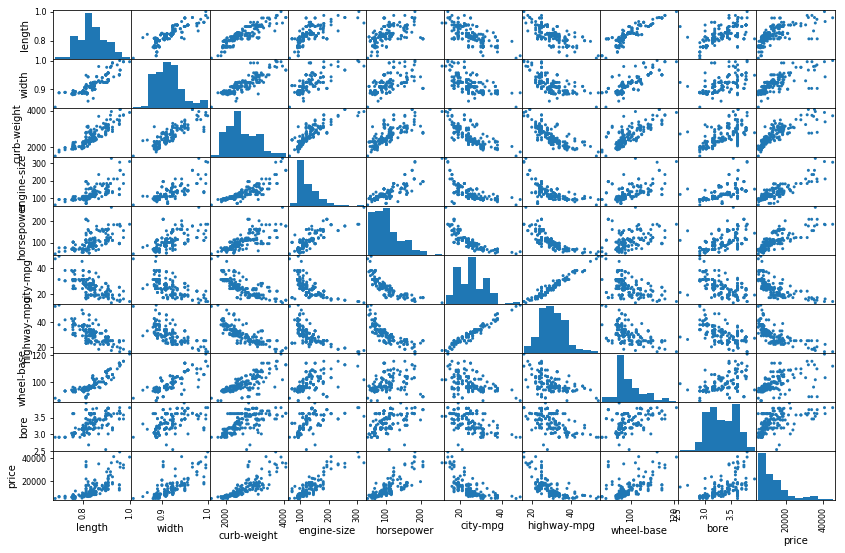

In [43]:
scat(mdf, figsize = (14,9), alpha = 1)
print('done')

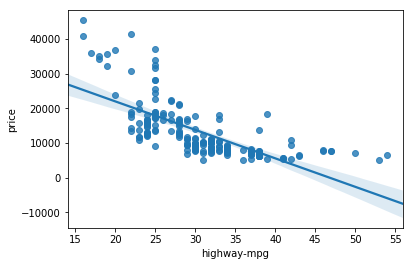

In [44]:
sns.regplot(x='highway-mpg', y='price', data = df)

### 2) Observe residuals plots for equal variance

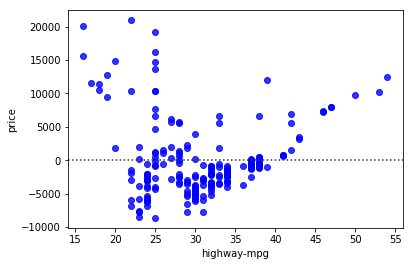

In [45]:
sns.residplot(df['highway-mpg'], df['price'], color = 'b')
#This plot shows a pattern, indicating price cannot be accurately predicted by mpg in linear regression 

### 3) Observe distribution plots for accurate predictions

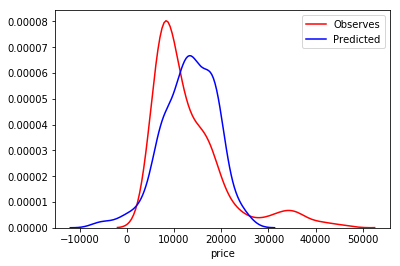

In [46]:
# Distribution plot of actual values of price
sns.distplot(df['price'], hist = False, color = 'r',label = 'Observes')
# Distribution plot of predicted values of price
sns.distplot(Yhat, hist = False, color = 'b',label = 'Predicted')

# Polynomial Regression

## Higher Order Regression
`Polyfit` will output an array of coefficients for the higher order regression function, to the degree you specify

`Poly1d` will create the predictor function

In [52]:
X = df['highway-mpg']
Y = df['price']

f = np.polyfit(X,Y,3)
p = np.poly1d(f)
print(p,'\n\n',f)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05 

 [-1.55663829e+00  2.04754306e+02 -8.96543312e+03  1.37923594e+05]


This can get complicated for Multivariate regressions, so use a library to "preprocess"

`PolynomialFeatures` function will create the object, like LinearRegression(), to the degree you specify. It actually creates whole new transformation of the features, as below
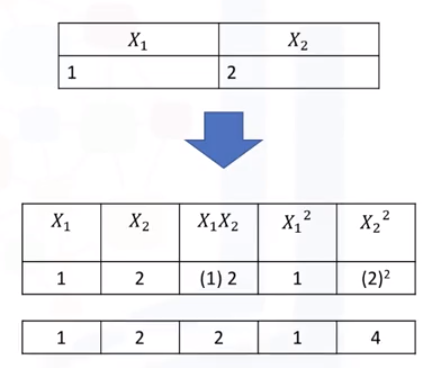
`.fit_transform` spits out an array of x-variables - every combination of x1*x2, x1^2, etc.


In [55]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 2, include_bias = False)
x_data = df[['horsepower','curb-weight']]
x_polly = pr.fit_transform(x_data)
x_polly.shape

(201, 5)

You might also want to standardise the variables --> fit them to N(0,1) distribution.

It's uncertain if you want to do this before or after fitting the polly shape. The answer is different, so it's best to do it in the pipeline.

In [ ]:
from sklearn.preprocessing import StandardScaler
Scale = StandardScaler()
Scale.fit(x_data)
x_scale = Scale.transform(x_data)
x_scale

### PlotPolly Function
##### A nice function to see if the linear model you created fits the pattern of the data well. Plots both y_hat and y_obs on the same graph

`x_new` is an array with 100 elements counting from 15-55

`y_new` fits the values of x_new to the model used in the linear regression

This will be plotted as a line against the scatter plot of observations

If the line we create looks like it better follows the pattern of the independant and dependant variables

the regression we create will be better.

In [53]:
def PlotPolly(model, independent_variable, dependent_variabble,title):
    x_min = min(independent_variable)
    x_max = max(independent_variable)
    x_new = np.linspace(x_min, x_max, 100) 
    y_new = model(x_new) 
   
    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
       
    plt.title(title)
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel('X Variable')
    plt.ylabel('Y Variable')

    plt.show()
    plt.close()

# Pipelines
All these features are built into `sklearn.pipeline`. Just create a list of tuples for the constructors of the model, and use the `Pipeline()` function.

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [68]:
# Input = [(model name, constructor),...]
Input = [('scale',StandardScaler()),
         ('polynomial',PolynomialFeatures(degree = 2)),
         ('model',LinearRegression())]

#pipe object serves to be trained into the regression model
pipe = Pipeline(Input)

#Fit the model 
x_data = df[['horsepower','curb-weight','engine-size','highway-mpg']]
Y = df[['price']]
pipe.fit(x_data,Y)

#Make predictions
Y_hat = pipe.predict(x_data)
Y_hat[0:5]

array([[13102.74784201],
       [13102.74784201],
       [18225.54572197],
       [10390.29636555],
       [16136.29619164]])

## Mean Squared Error and R^2
To numerically evaluate the model we use:

- MSE, the squared distance between y_hat and y_obs
- R^2, the coefficient of determination, how much better the regression is than just the mean
    
    =( 1- MSE_reg / MSE_mean )

In [69]:
from sklearn.metrics import mean_squared_error as MSE

In [70]:
lm = LinearRegression()
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)
Yhat = lm.predict(X)

MSE_reg = MSE(df['price'],Yhat)
Rsq     = lm.score(X,Y)

# Evaluating the Model

## Cross Validation
The use of parts of the dataset to train, parts to test, and corroboration of all the above info to get an accurate model.

In [80]:
from sklearn.model_selection import train_test_split as TTS
# creates 4 datasets from random selection of the data. You can perform regression on parts of these and cross validate yourself
x_train, x_test, y_train, y_test = TTS(x_data,Y,test_size = 0.3,random_state = 0)
x_train.head()

,horsepower,curb-weight,engine-size,highway-mpg
96,97.0,2324,120,34
181,85.0,2212,109,34
19,70.0,1909,90,43
153,70.0,2109,98,37
92,69.0,2028,97,37


In [118]:
from sklearn.model_selection import cross_val_score as CVS
# partition the data into three parts, test each, output the R^2. 
score = CVS(lm,x_data,Y,cv=3)
score

array([0.78742931, 0.73702144, 0.55859373])

In [81]:
from sklearn.model_selection import cross_val_predict as CVP
# as above, output the y_hat values. 
pred = CVP(lm,x_data,Y,cv=3)
pred[0:5]

array([12770.54431466, 12770.54431466, 18135.85242174,  9586.87544881,
       14158.06332515])

## Overfitting
When the model tries to predict the noise - which is random and unpredictable - by having an overcomplicated function.

Test for noise by trying many different polynomial orders, and testing the R2 of each

Rsq improves with higher orders


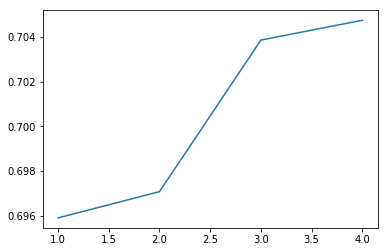

In [87]:
Rsq_Test = []
order = [1,2,3,4]
for n in order:
        pr = PolynomialFeatures(degree = n)
        x_train_pr = pr.fit_transform(x_train[['horsepower']])
        x_test_pr  = pr.fit_transform(x_test[['horsepower']])
        lm.fit(x_train_pr,y_train)
        Rsq_Test.append(lm.score(x_test_pr,y_test))
plt.plot(order,Rsq_Test,'-')
print("Rsq improves with higher orders")

## Ridge Regression and Alpha
To prevent overfitting data by restricting coefficients

In [89]:
from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha = 0.1) #Determine what you want alpha to be
RidgeModel.fit(x_data,Y) #Fit to this dataset
Yhat = RidgeModel.predict(x_data) #create a yhat from this set

## Grid Search
For optimising parameters

In [114]:
from sklearn.model_selection import GridSearchCV as GS
hyperparams = [{'alpha':[0.001,0.1,1,10,100,1000],
               'normalize':[True,False]}]
RM = Ridge()
Grid1 = GS(RM, hyperparams,cv=4)
Grid1.fit(x_data,Y)
Grid1.best_estimator_

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [112]:
Grid1.cv_results_['mean_test_score']

array([ 0.66605547,  0.66548837,  0.69417563,  0.66548894,  0.69048693,
        0.66549413,  0.32137688,  0.66554568,  0.01705517,  0.66602936,
       -0.03019617,  0.66896822])